In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math as m
import seaborn as sns
import pandas as pd
from scipy.stats import powerlaw
import time
aem = 1740

# Problem 1-solved

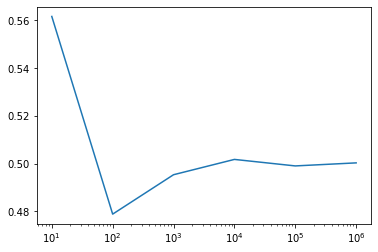

In [3]:
#seed
np.random.seed(aem)
# numbers N 
x_axis = np.array([10**x for x in range(1,7)])
# means_array 
y_axis = np.array([np.random.rand(10**x).mean() for x in range(1,7)])
plt.plot(x_axis,y_axis)
plt.xscale('log')

# Problem 2-Solved

In [6]:
########1D grid##########
#We assume it starts from position 0 every time.\n",
# Thus for the calculation of square distance each time I just square the position (finalpos-0)^2\n",
mean_sd = 0
exps = 100000
t=1000
step_length = 1
for i in range(exps):
    position = 0
    for j in range(t):
        move = random.choice(['left','right'])
        if move=='left':
            position-=step_length
        elif move=='right':
            position+=step_length
    squared_displacement = position**2
    mean_sd+=squared_displacement
print(mean_sd/exps)

999.98844


In [8]:
########2D grid##########
#We assume it starts from position (0,0) every time
#Thus for the calculation of square distance each time I just find the length of vector (x,y) an square it. i.e. x^2+y^2
mean_sd = 0
exps = 100000
t=1000
for i in range(exps):
    position = [0,0]
    for j in range(t):
        move = random.choice(['left','right','up','down'])
        if move=='left':
            position[0]-=1
        elif move=='right':
            position[0]+=1
        elif move=='up':
            position[1]+=1
        elif move=='down':
            position[1]-=1
    squared_displacement = position[0]**2+position[1]**2
    mean_sd+=squared_displacement
print(mean_sd/exps)

1002.11644


In [9]:
########2D-continuum##########
#We assume it starts from position (0,0) every time.\n",
#Thus for the calculation of square distance each time I just find the length of vector (x,y) an square it. i.e. x^2+y^2
mean_sd = 0
exps = 100000
t=1000
for i in range(exps):
    position = [0,0]
    for j in range(t):
        angle = (random.randint(0,359)/180)*m.pi
        position[0]+=round(m.cos(angle),2)
        position[1]+=round(m.sin(angle),2)
    squared_displacement = position[0]**2+position[1]**2
    mean_sd+=squared_displacement
print(mean_sd/exps)

1005.1647595580122


# extra problem-solved

In [10]:
mean_sd = 0
exps = 10000
t=1000
averages = [0]*10
for i in range(exps):
    position = [0,0]
    points = []
    for j in range(1,t+1):
        angle = (random.randint(0,359)/180)*m.pi
        position[0]+=round(m.cos(angle),2)
        position[1]+=round(m.sin(angle),2)
        if j%100==0:
            points.append(position[0]**2+position[1]**2)
    for j in range(len(points)):
        averages[j]+=points[j]/exps
print(averages)

[101.2907041700001, 199.79857071999913, 297.8392375200017, 399.5614360099998, 504.5480248699999, 602.5193939499975, 702.4344463299973, 803.8808653399961, 904.3229321300012, 1001.3281997799991]


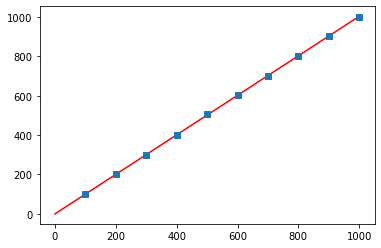

In [11]:
t = np.arange(100,1001,100)
A = np.vstack([t, np.ones(len(t))]).T
m,c = np.linalg.lstsq(A, averages, rcond=None)[0]
x = np.linspace(0,1000,100)
y = m*x+c
plt.plot(x, y, '-r', label='y=2x+1')
plt.plot(t,averages,'s')
plt.show()

# Problem 3- In Progress

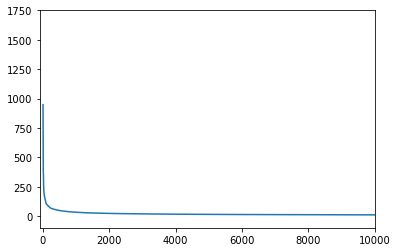

In [14]:
####histogram from uniform distribution######
uniform_distribution = list(np.random.rand(10000))
def formula(x):
    y_min = 10
    y_max = 10**6
    gamma = 3
    delta = 1-gamma
    return ((y_max**delta-y_min**delta)*x+y_min**delta)**(1/delta)
power_law_dist = [formula(x) for x in uniform_distribution]
power_law_dist.sort(reverse=True)
plt.plot(power_law_dist)
plt.xlim(-100, 10000)
plt.ylim(-100 ,1750)
plt.show()

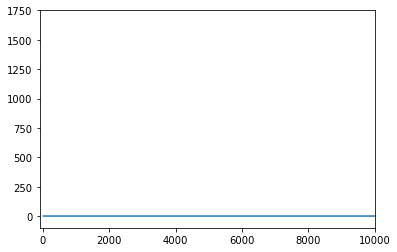

In [15]:
#####actual power law######
def power_func(y):
    y_min = 10
    y_max = 10**6
    gamma = 3
    delta = 1-gamma
    C = delta*(1/(y_max**delta-y_min**delta))
    return C*(y**(-gamma))
t = np.arange(10,10**6,10.0)
plt.plot(t,power_func(t))
plt.xlim(-100, 10000)
plt.ylim(-100 ,1750)
plt.show()

# Problem 4-Solved

In [3]:
#we denote the connections with a symmetric matrix of 10000x10000 
#with zeros in the diagonal elements
#if element 12 or 21 of the matrix has 1 it means that nod 1 is connected
#to nod 2
def simulation(n_nodes, one_prob):
    z = np.random.choice([0,1],p = [1-one_prob,one_prob], size = [n_nodes,n_nodes])
    np.fill_diagonal(z,0)
    z = np.tril(z)
    z = z+z.T
    n_edges = np.sum(z,axis=1)
    return n_edges

In [4]:
######experiment######
exps = 1000
n_nodes = 10000
probability = 0.15
means = [0]*n_nodes
mean_k = 0
for i in range(exps):
    x = simulation(n_nodes,probability)
    mean_k+=sum(x)/n_nodes/exps
    for j in range(n_nodes):
        means[j]+=x[j]/exps

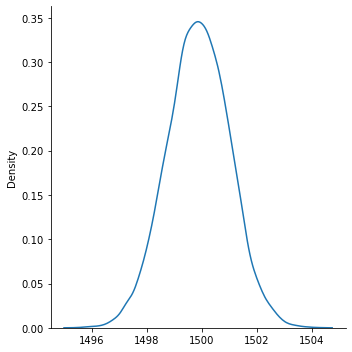

In [6]:
sns.displot(means, kind="kde")

In [7]:
print(mean_k)

1499.876890400001


# Problem 5-Solved

In [2]:
########1-d case###########
exps = 10000
step_length = 1
s_t = [0]*10
for i in range(exps):
    position = 0
    min_pos = 0
    max_pos = 0
    for t in range(1,1001):
        move = random.choice(['left','right'])
        if move=='left':
            position-=step_length
        elif move=='right':
            position+=step_length
        if position<min_pos:
            min_pos = position
        elif position>max_pos:
            max_pos = position
        if t%100==0:
            s_t[t//100-1]+= max_pos-min_pos+1
mean_s = np.array([(x/exps) for x in s_t])
t = np.arange(100,1001,100)

In [3]:
print(mean_s)
print(t)

[15.9652 22.5097 27.6719 31.9875 35.7872 39.2138 42.2848 45.1043 47.7682
 50.3276]
[ 100  200  300  400  500  600  700  800  900 1000]


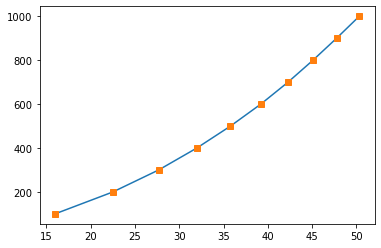

In [4]:
plt.plot(mean_s,t)
plt.plot(mean_s,t,'s')

In [66]:
########2-d case###########\n",
exps = 10000
step_length = 1
s_t = [0]*10
for i in range(exps):
    position = [0,0]
    all_positions = [[0,0]]
    for t in range(1,1001):
        move = random.choice(['left','right','up','down'])
        if move=='left':
            position[0]-=step_length
        elif move=='right':
            position[0]+=step_length
        elif move=='up':
            position[1]+=step_length
        elif move=='down':
            position[1]-=step_length
        if position not in all_positions:
            all_positions.append([position[0],position[1]])
        if t%100==0:
            s_t[t//100-1]+= len(all_positions)
mean_s = np.array([(x/exps) for x in s_t])
t = np.arange(100,1001,100)

In [67]:
print(mean_s)
print(t)

[ 49.4881  89.153  126.337  162.111  196.8941 230.9667 264.5092 297.5383
 330.2329 362.7487]
[ 100  200  300  400  500  600  700  800  900 1000]


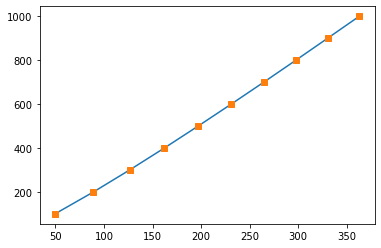

In [68]:
plt.plot(mean_s,t)
plt.plot(mean_s,t,'s')

# Problem 6-In Progress

In [69]:
class grid_2D:
    def __init__( self, x , y):
        self.x = x
        self.y = y
        self.grid = np.zeros((x,y),dtype=int)
    def add_molecule_traps(self, c):
        """
        c is the concetration of molecules i.e. NumberOfMolecules/(250000)
        """
        grid = self.grid
        N = int((self.x*self.y)*c)
        molecules = 0
        while molecules<N:
            x = random.randint(0,self.x-1)
            y = random.randint(0,self.y-1)
            if grid[x,y]==0:
                grid[x,y]=1
                molecules+=1
    def add_particle(self):
        while True:
            x = random.randint(0,self.x-1)
            y = random.randint(0,self.y-1)
            if self.grid[x,y]==0:
                self.particle_position = [x,y]
                break
    def random_walk(self):
        """
        bc1: boundary condition that makes the particle to move like a cycle through the grid when
        it hits the boundary for example in a square grid of 500x500 block if the particle has to go
        from [499,0] to the right it goes to [0,0]. Same for up and down directions.
        bc2: instead of the cyclical move now it returns back when it hits the boundary. i.e. from
        [499,0] to the right it goes to [498,0] and so on
        """
        def get_next_position(pos,rows,columns):
            """ takes as an input the particle position list [x,y] and returns the list [x_new,y_new] which is picked
            uniformly from the four possible directions [up,down,left,right]
            with the bc1
            """
            move = random.choice(['left','right','up','down'])
            if move=='left':
                return [pos[0],(pos[1]-1)%columns]
            elif move=='right':
                return [pos[0],(pos[1]+1)%columns]
            elif move=='up':
                return [(pos[0]-1)%rows, pos[1]]
            elif move=='down':
                return [(pos[0]+1)%rows, pos[1]]
        initial_position = self.particle_position
        position = initial_position
        steps=0
        unique_positions = [position]
        while True:
            next_position = get_next_position(position,self.x,self.y)
            if self.grid[next_position[0],next_position[1]]==1:
                steps+=1
                break
            else:
                position = next_position
                steps+=1
            if next_position not in unique_positions:
                unique_positions.append(next_position)
        self.nunique_pos = len(unique_positions)
        return steps
    def show(self):
        display(self.grid)

In [70]:
##################test#################
some_grid = grid_2D(5,5)
some_grid.add_molecule_traps(0.2)
tt = []
unique_positions = []
for i in range(10):
    some_grid.add_particle()
    tt.append(some_grid.random_walk())
    unique_positions.append(some_grid.nunique_pos)
new = [(1-0.2)**x for x in unique_positions]
print(new)
print(tt)

[0.3276800000000001, 0.1677721600000001, 0.10737418240000006, 0.3276800000000001, 0.8, 0.5120000000000001, 0.8, 0.6400000000000001, 0.13421772800000006, 0.1677721600000001]
[5, 13, 20, 6, 1, 3, 1, 2, 16, 11]


In [71]:
########create 500x500 grid######
c = 10**(-2)
grid1 = grid_2D(500,500)
grid1.add_molecule_traps(c)

In [72]:
trap_times1 = []
for i in range(100000):
    grid1.add_particle()
    trap_times1.append(grid1.random_walk())

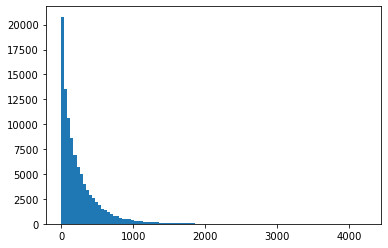

In [73]:
plt.hist(trap_times1, bins = 100)
plt.show()

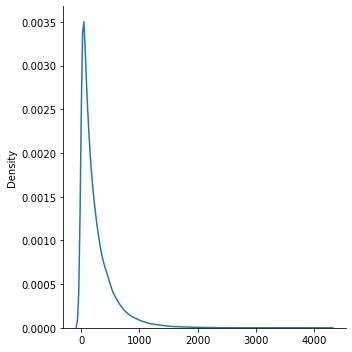

In [74]:
sns.displot(trap_times1, kind="kde")

In [75]:
########create 500x500 grid######
c = 10**(-3)
grid2 = grid_2D(500,500)
grid2.add_molecule_traps(c)

In [76]:
trap_times2 = []
for i in range(100000):
    grid2.add_particle()
    trap_times2.append(grid1.random_walk())

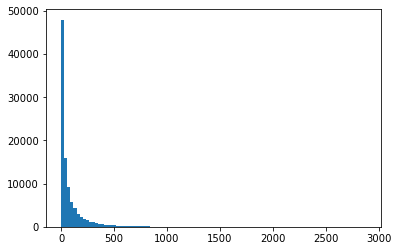

In [77]:
plt.hist(trap_times2, bins = 100)
plt.show()

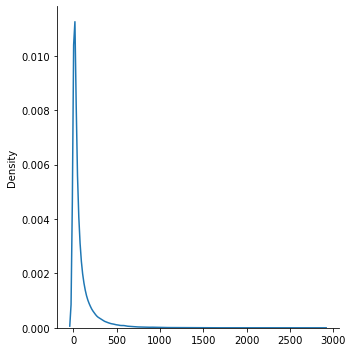

In [79]:
sns.displot(trap_times2, kind="kde")

In [81]:
timetrap_data = pd.DataFrame({"c=10^(-2)":trap_times1,"c=10^(-3)":trap_times2})
timetrap_data

,c=10^(-2),c=10^(-3)
0,134,161
1,162,2
2,177,4
3,27,36
4,54,40
...,...,...
99995,23,126
99996,638,342
99997,152,55
99998,667,141


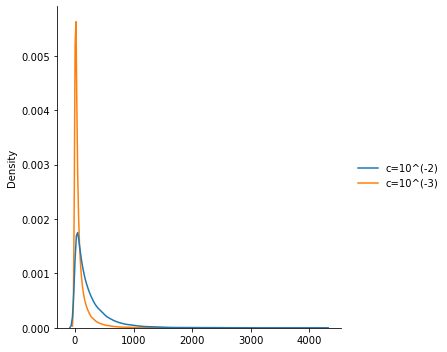

In [82]:
sns.displot(data=timetrap_data,kind = 'kde')